In [1]:
import pandas as pd
import yaml
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
languages = pd.read_csv("languages.csv")

In [3]:
byte_size = languages.groupby(["language"])["size"].sum().reset_index(name = "size")
n_repos = languages.groupby(["language"])["size"].count().reset_index(name = "repos")
lang_props = byte_size.merge(
  n_repos,
  how = "left",
  on = "language"
)

In [4]:
total_byte_size = languages["size"].sum()
total_n_repos = len(languages["repo_name"].unique())

In [5]:
lang_props["size_prop"] = lang_props["size"] / total_byte_size
lang_props["repo_prop"] = lang_props["repos"] / total_n_repos

In [6]:
with open(f"language_colors.yaml", "r") as yaml_file:
  colors_yaml = yaml.safe_load(yaml_file)
colors = pd.DataFrame.from_dict({
  "language": colors_yaml.keys(),
  "color": colors_yaml.values()
})

In [7]:
lang_props = lang_props.merge(
  colors,
  how = "left",
  on = "language"
)

In [8]:
#* Define plot size
plot_columns = 3
plot_rows = math.ceil(lang_props.shape[0] / plot_columns)

In [9]:
#* Build the x axis
x_axis = np.array([], dtype = int)
for i in range(1, plot_columns + 1):
  x_axis = np.append(
    x_axis,
    np.repeat(np.array([i]), plot_rows)
  )
x_axis = x_axis[0:lang_props.shape[0]]

In [10]:
#* Build the y axis
y_axis = np.array([], dtype = int)
for i in range(1, plot_columns + 1):
  y_axis = np.append(
    y_axis,
    np.array(range(plot_rows, 0, -1))
  )
y_axis = y_axis[0:lang_props.shape[0]]

In [11]:
#* Sort data frame
lang_props = lang_props.sort_values(by = ["size_prop"], ascending = False).reset_index(drop = True)

In [12]:
lang_props["x_axis"] = x_axis
lang_props["y_axis"] = y_axis

In [13]:
labels = []
for i in range(0, lang_props.shape[0]):
  value = lang_props["size_prop"][i] * 100
  if value < 0.01:
    labels.append(f'{lang_props["language"][i]} (<0.01%)')
  else:
    labels.append(f'{lang_props["language"][i]} ({value:.2f}%)')
lang_props["label"] = labels

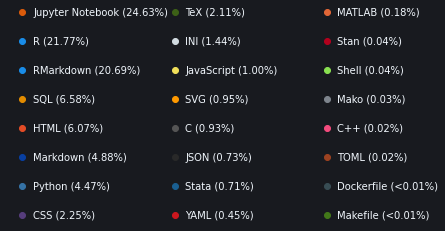

In [14]:
fig = plt.figure()
ax = fig.add_subplot()
ax.axis([0.9, max(x_axis) + 0.1, 0.7, max(y_axis) + 0.2])

for i in range(lang_props.shape[0]):
  ax.plot(
    lang_props.x_axis[i],
    lang_props.y_axis[i],
    color = lang_props["color"][i],
    marker = "o"
  )
  ax.text(
    lang_props.x_axis[i] + 0.07,
    lang_props.y_axis[i] - 0.1,
    lang_props["label"][i],
    color = "#f0f6fc"
  )

ax.axis("off")
fig.patch.set_facecolor("#181a1f")